In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll

In [9]:
x = '\thello\n     '
x()

In [8]:
def main():
    df = pd.read_csv('food-consumption.csv')
    #remove countries with missing entries, for this sake of the exercise 
    df.set_index('Country',inplace=True)
    #checking for countries with missing values
    df.isnull().T.sum()
    #removing 'Spain', 'Finalnd', 'Sweden'
    df.dropna(axis=0, inplace=True)
    #extract attributes from data
    X = df.values
    m, n = X.shape
    
    ##Normalizing data (x - mu)/std
    mu = np.sum(X,axis=0)
    #std = np.std(X,axis=0)
    
    #X = X @ np.diag(np.ones(X.shape[1])/std)
    Xc = X.T - mu[:, None]
    print(Xc.shape)
    #Covariance matrix
    C = np.dot(Xc, Xc.T)/m
    print(C.shape)
    #calculating eigenvectors and values
    K = 2
    S, W = ll.eigs(C, k=K)
    S = S.real
    W = W.real
    print(W.shape)
    #Calculating the new dimensions Z1, Z2
    dim1 = np.dot(W[:,0].T,Xc)/np.sqrt(S[0])
    print(dim1.shape)
    dim2 = np.dot(W[:,1].T,Xc)/np.sqrt(S[1])
    
    #plot of the entries of the of the first  component with largest magnitude
    plt.figure(figsize=(8,7))
    plt.scatter(np.arange(len(W)), np.abs(W[:,0]))
    for x, y, label in zip(np.arange(len(W)), np.abs(W[:, 0]), df.columns):
        plt.annotate(label, xy=(x,y))
    plt.title('component 1');
    #plot of the entries of the of the second  component with largest magnitude
    plt.figure(figsize=(8,7))
    plt.scatter(np.arange(len(W)), np.abs(W[:,1]))
    for x, y, label in zip(np.arange(len(W)), np.abs(W[:, 1]), df.columns):
        plt.annotate(label, xy=(x,y))
    plt.title('component 2');
    #plotting Z1 against Z2 - scatterplot of new representations
    plt.figure(figsize=(8,7))
    plt.scatter(dim1,dim2)
    for x, y, label in zip(dim1, dim2, df.index):
        plt.annotate(label, xy=(x,y))
    plt.title('feature1 vs feature2')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    return S, W, dim1, dim2

(20, 13)
(20, 20)
(20, 2)
(13,)


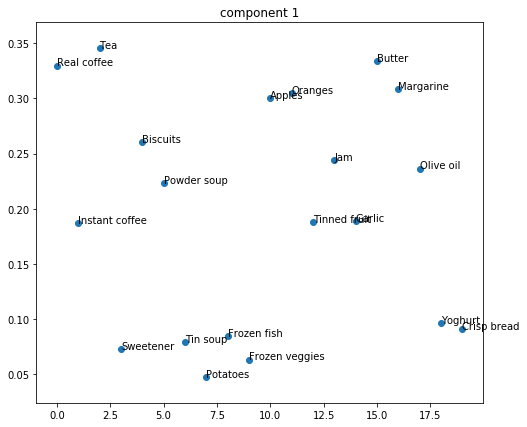

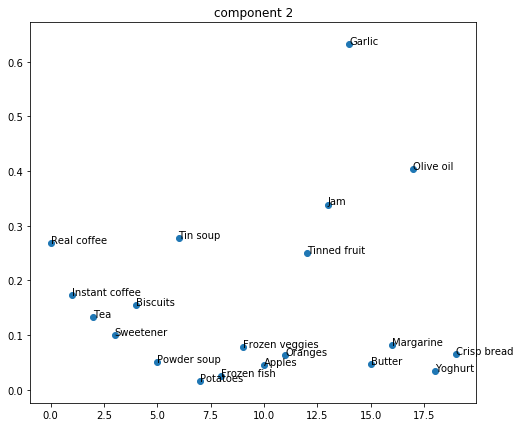

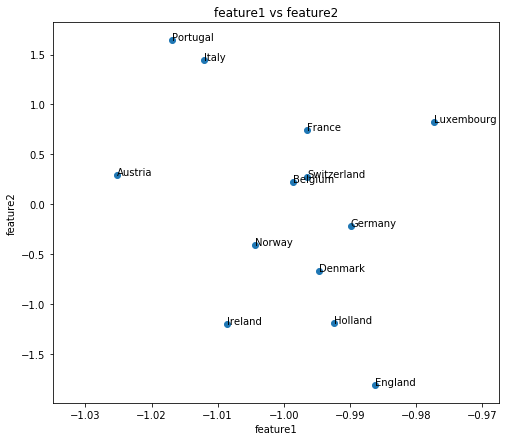

In [9]:
if __name__ == "__main__":
    S, W, dim1, dim2 = main()